## Imports & Config

In [1]:
import torch
import yaml
from arcade_dataset import load_dataset, visualize_batch
import matplotlib.pyplot as plt
from model import VesselSegmentationModel
import pytorch_lightning as pl
torch.cuda.empty_cache()

In [2]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [3]:
config = yaml.load(open('model_overfit_config.yaml', 'r'), Loader=yaml.FullLoader)

In [4]:
modalities, H_in, W_in = config['input']['image_shape']

## Model Definition

In [5]:
# model = VesselSegmentationModel.load_from_checkpoint('/home/paperspace/DMI2024B/models/first_run/epoch=155-step=19500.ckpt')
model = VesselSegmentationModel.load_from_checkpoint('models/final_model/oxwn02hh/epoch=152-step=19125.ckpt')

In [6]:
trainer = pl.Trainer(accelerator='auto')
trainer.test(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/paperspace/DMI2024B/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA RTX A5000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         test_f1             0.361115962266922
        test_iou            0.23424004018306732
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_f1': 0.361115962266922, 'test_iou': 0.23424004018306732}]

In [35]:
# trainer = pl.Trainer()
# model.test_step(model.test_dataloader(), 0)

## Overfit the model on a single batch

In [7]:
dataset = load_dataset(split='val')
next(iter(dataset)).keys()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True)

In [8]:
batch = next(iter(dataloader))

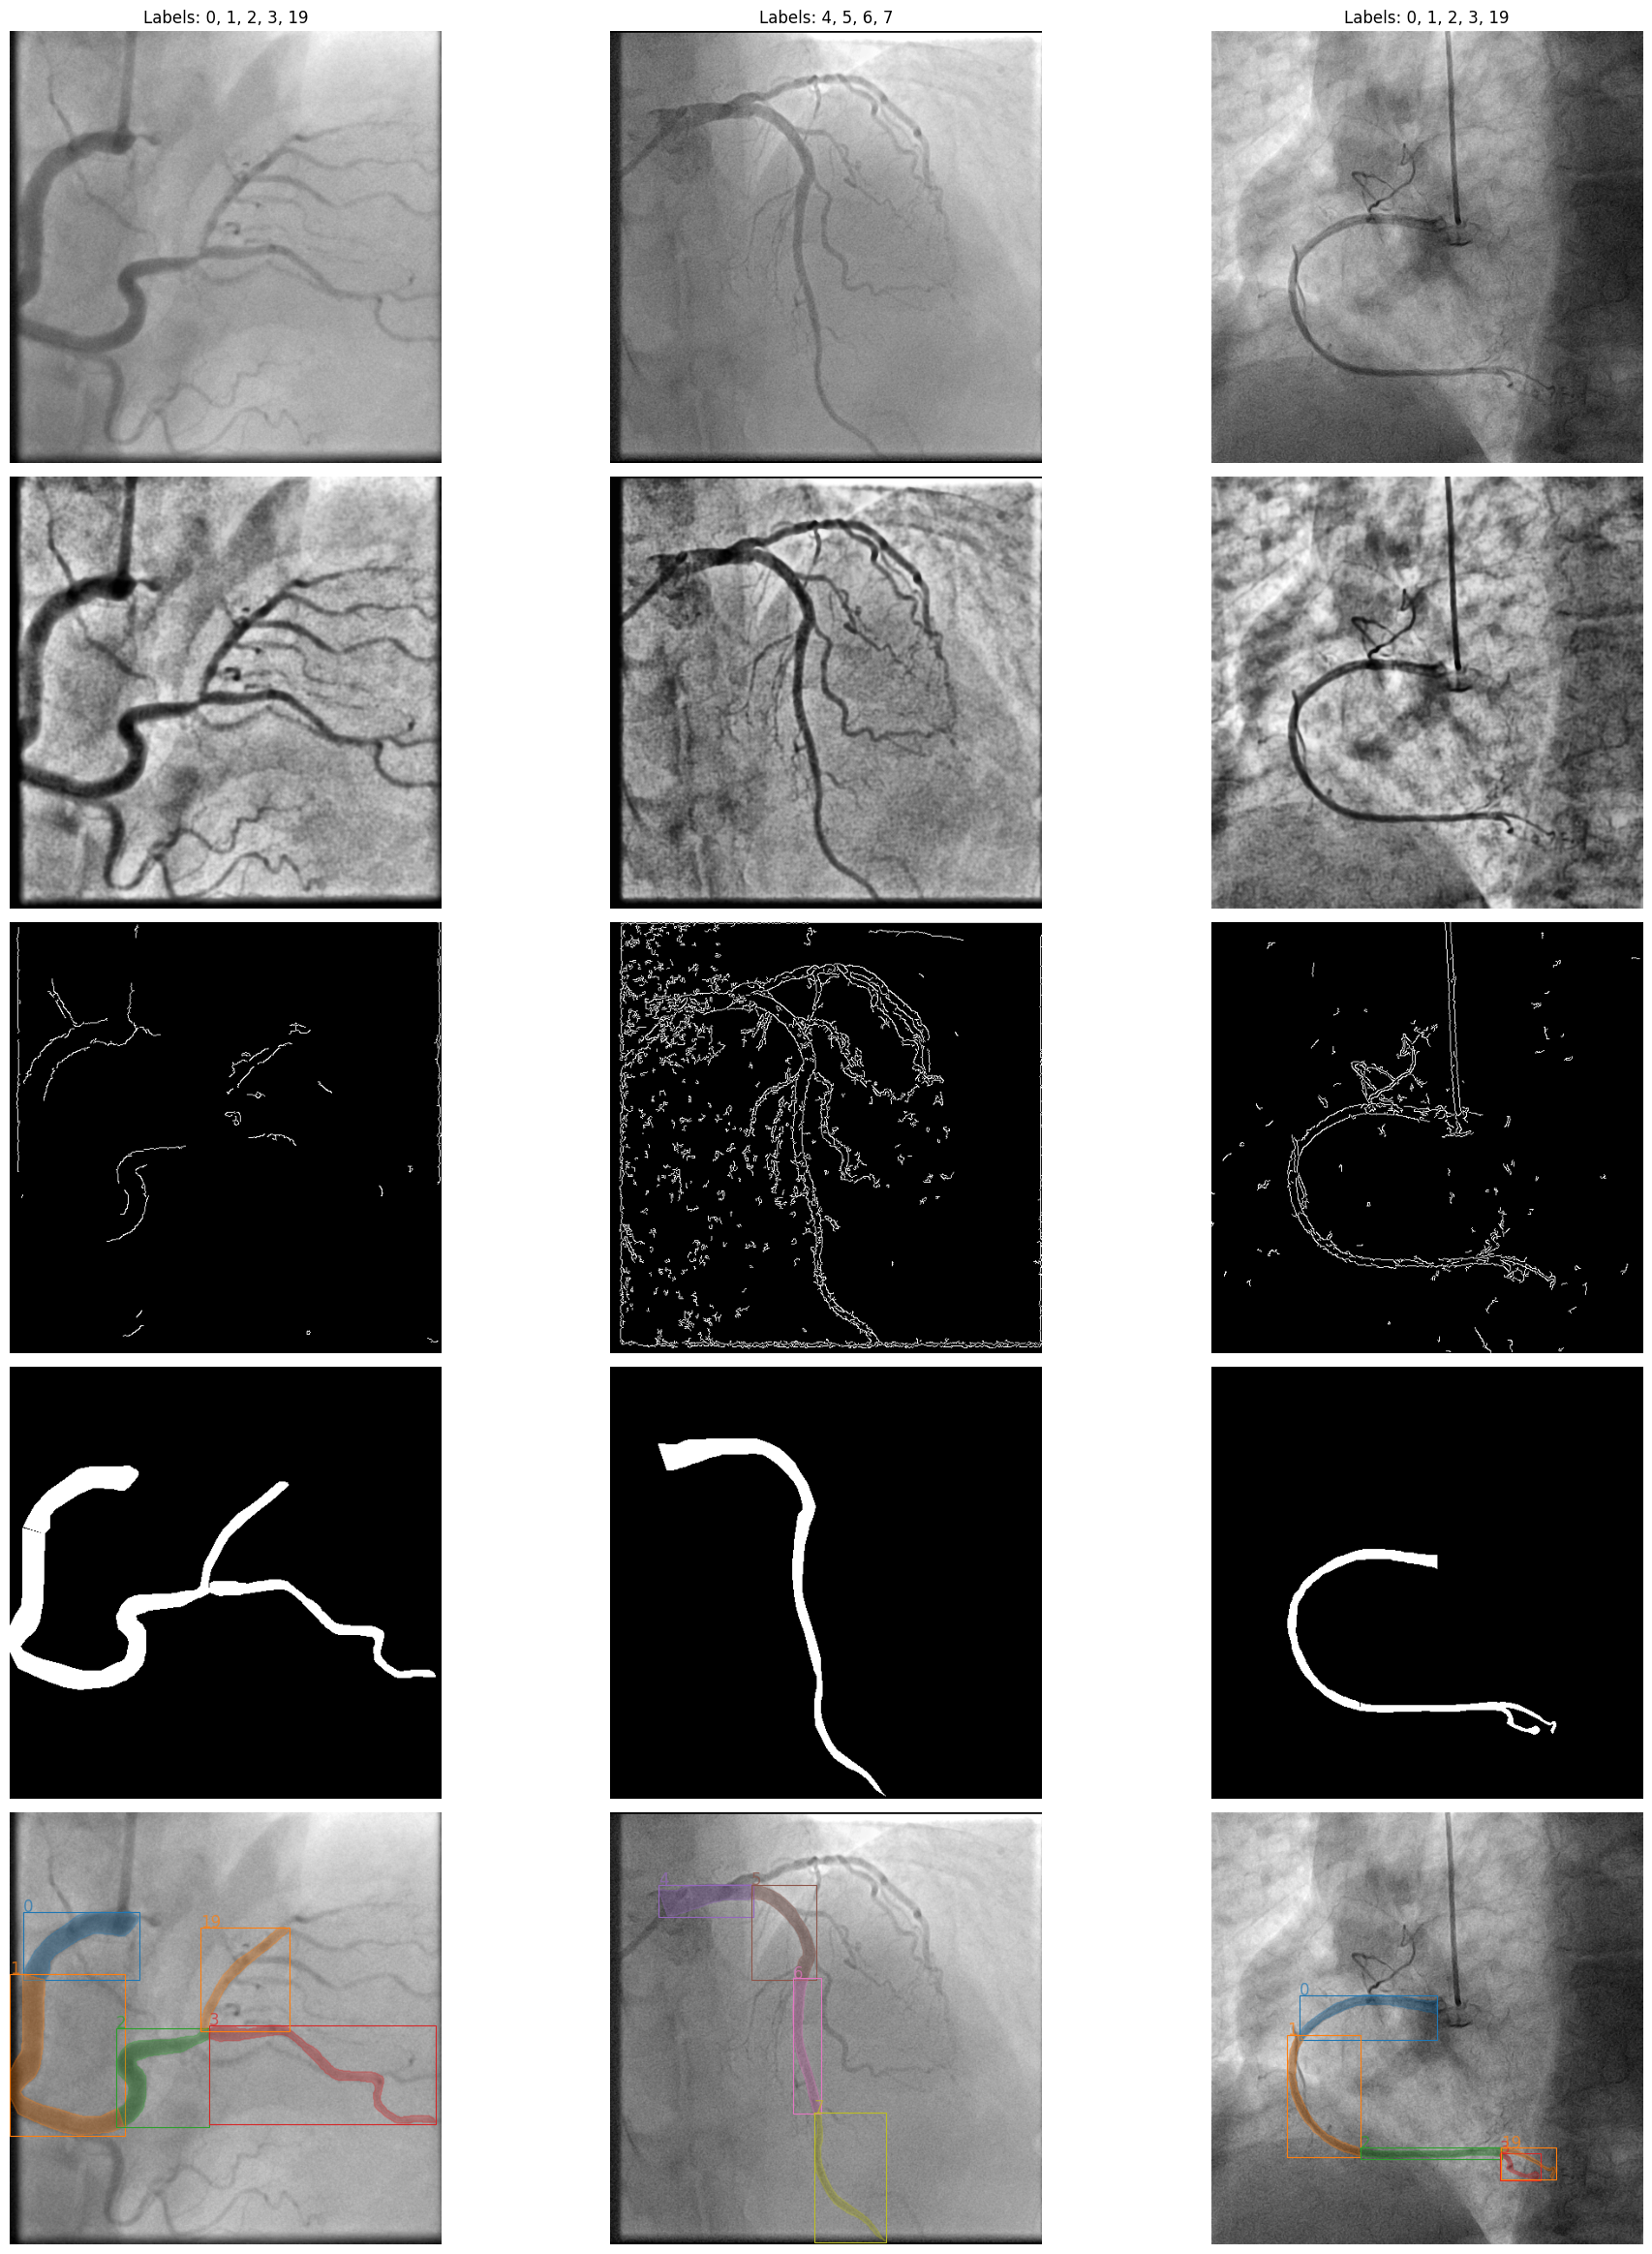

In [9]:
visualize_batch(batch, num_classes=25, num_images=3)

In [43]:
# Look at the output of the model
model.eval()
model.to(device)
x, y_gt = batch['transformed_image'], batch['separate_masks']
decoder_output, vae_output, _, labels, _ = model(x)
img = 2

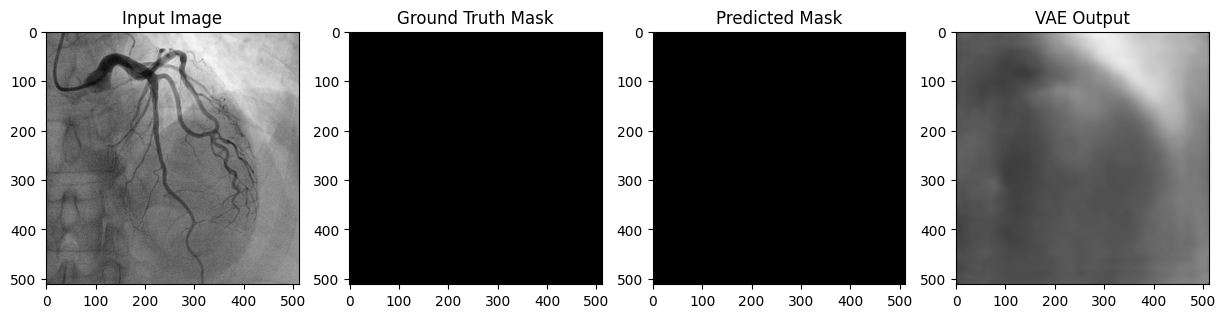

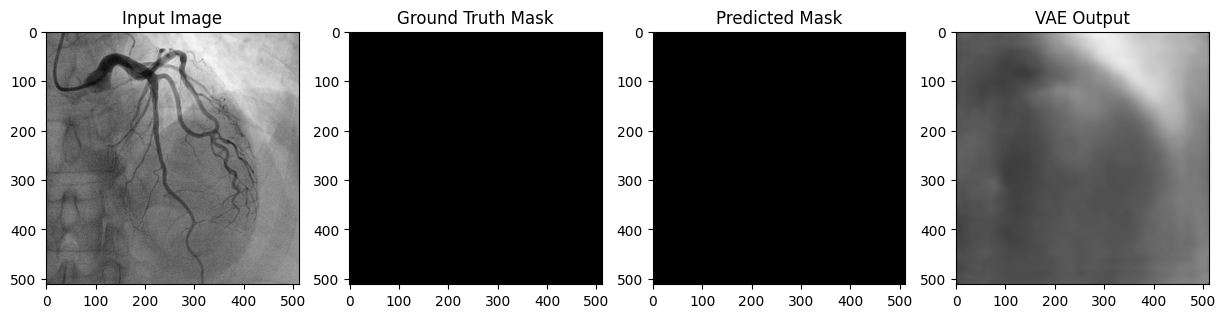

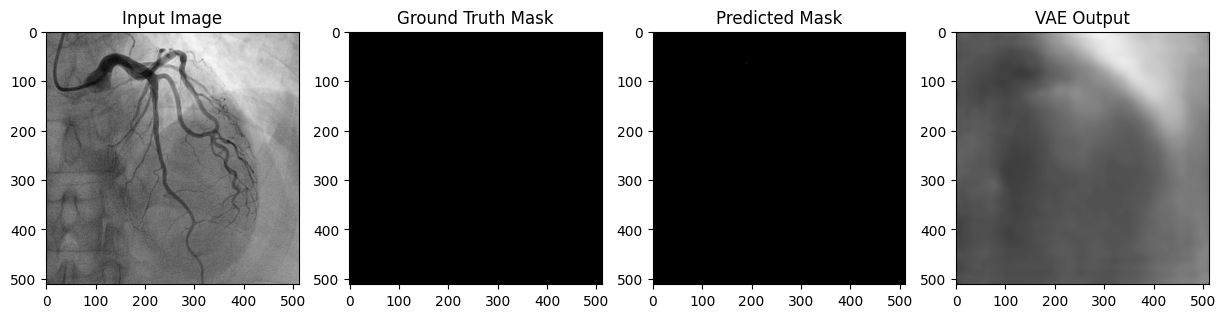

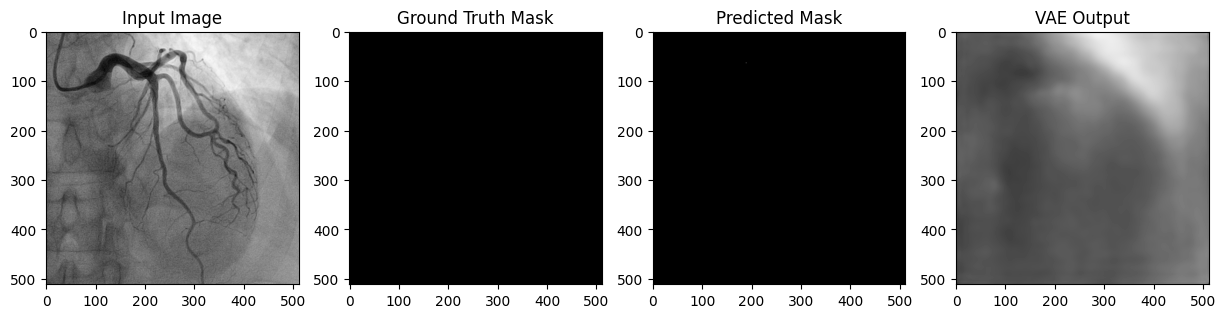

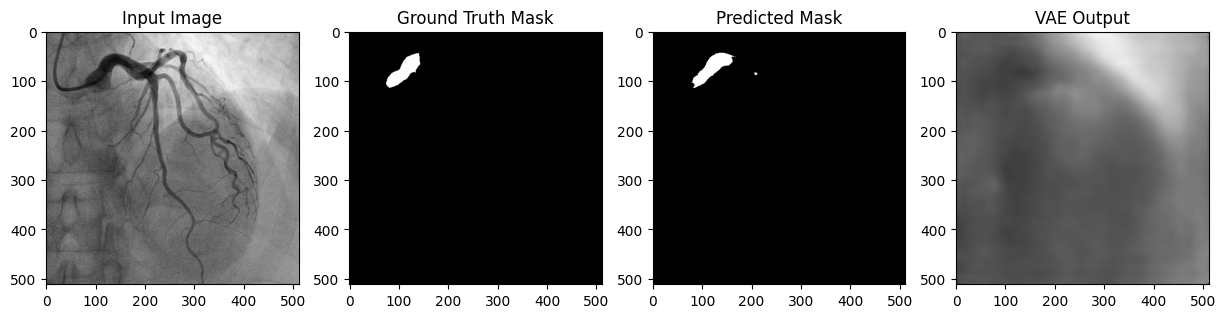

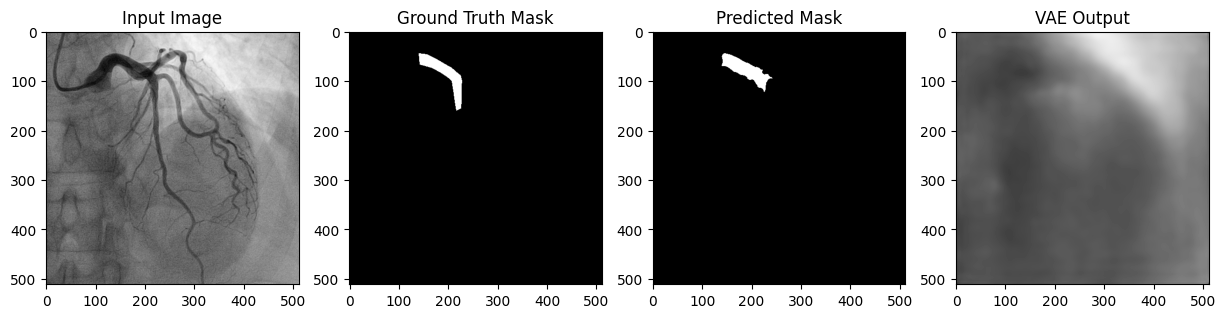

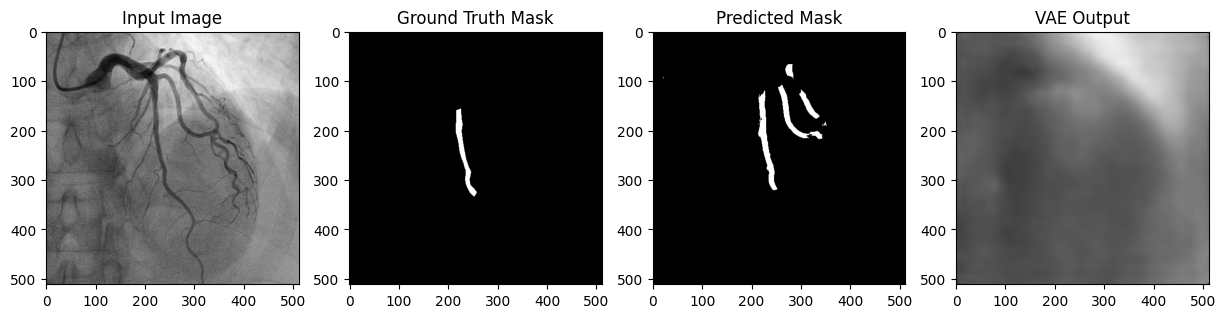

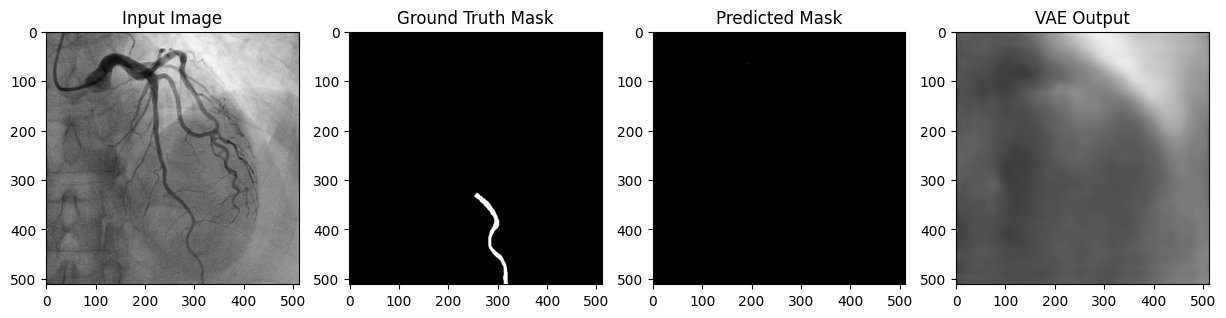

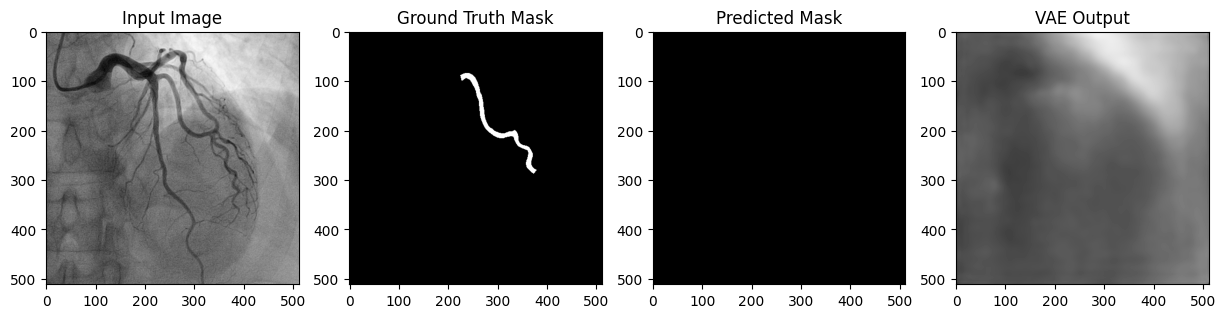

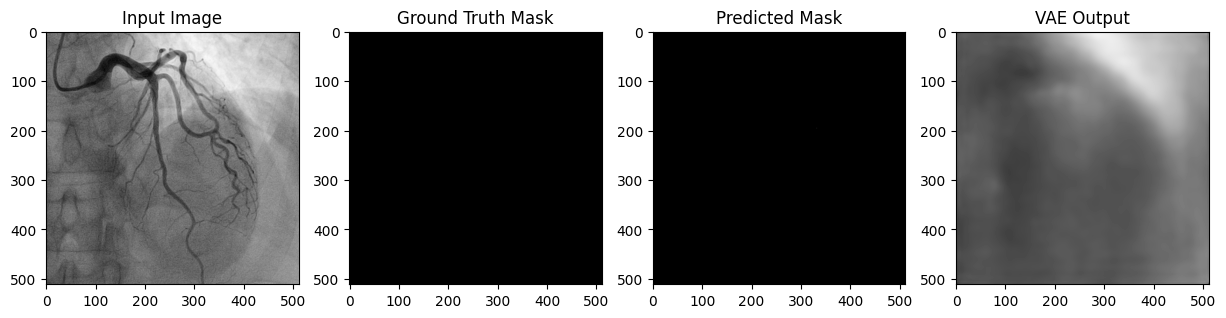

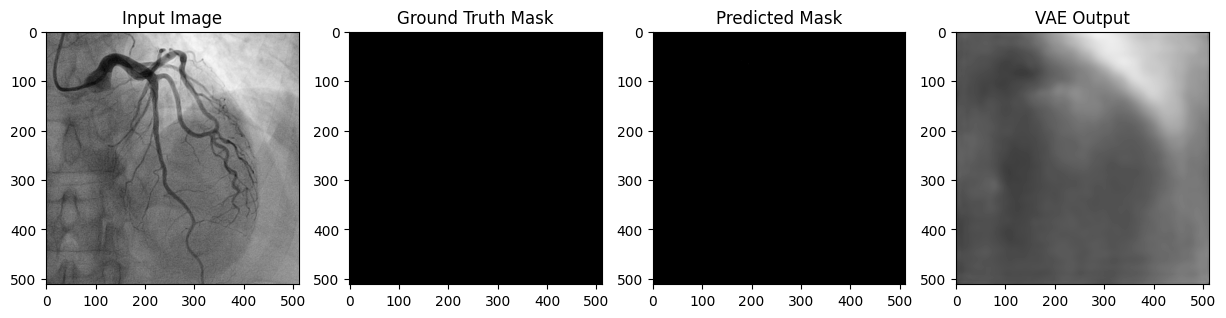

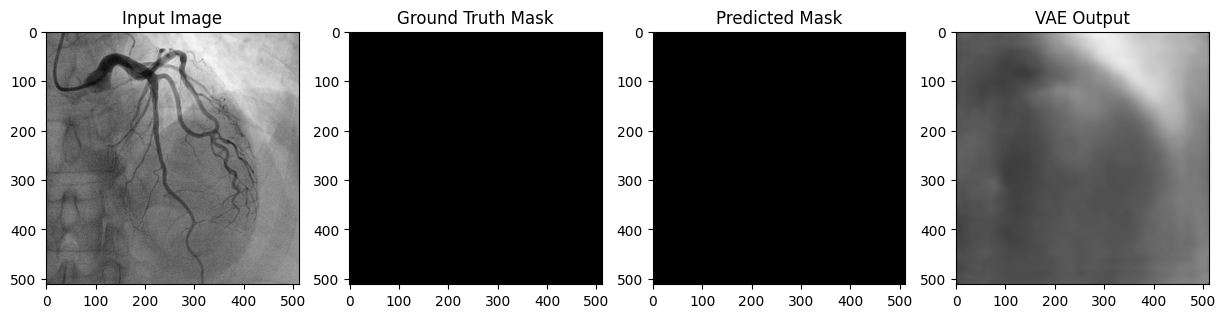

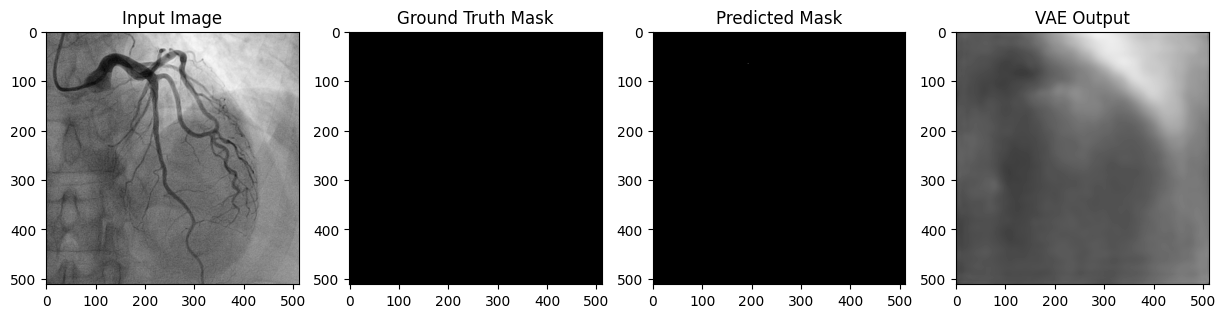

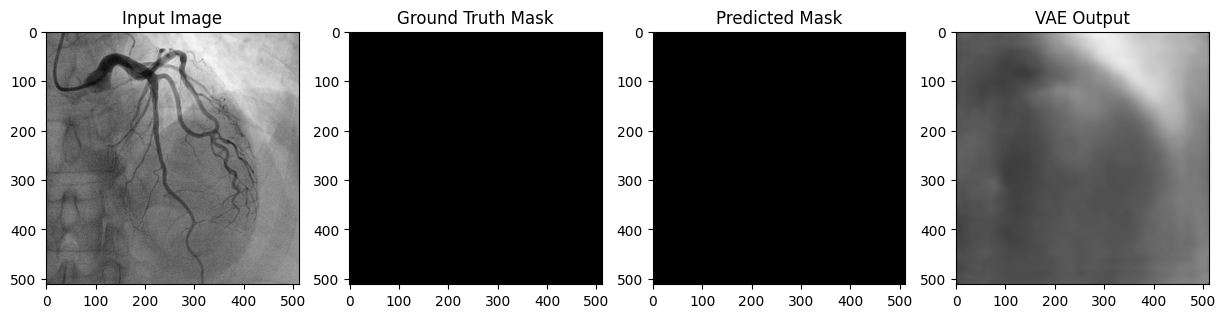

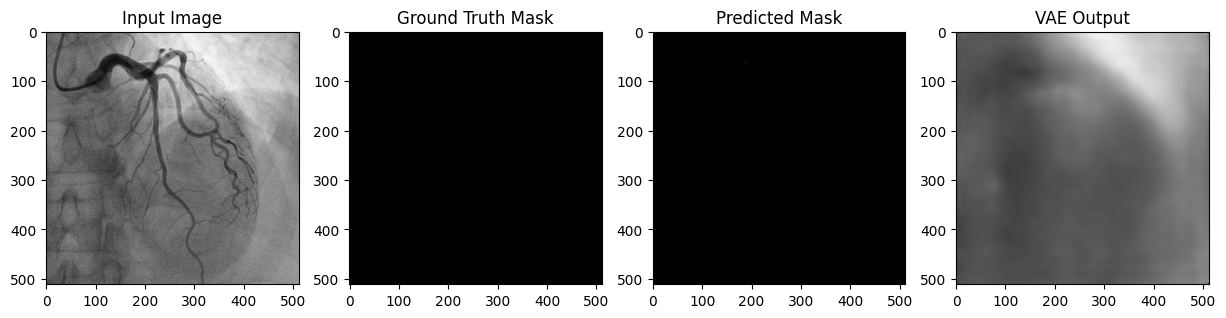

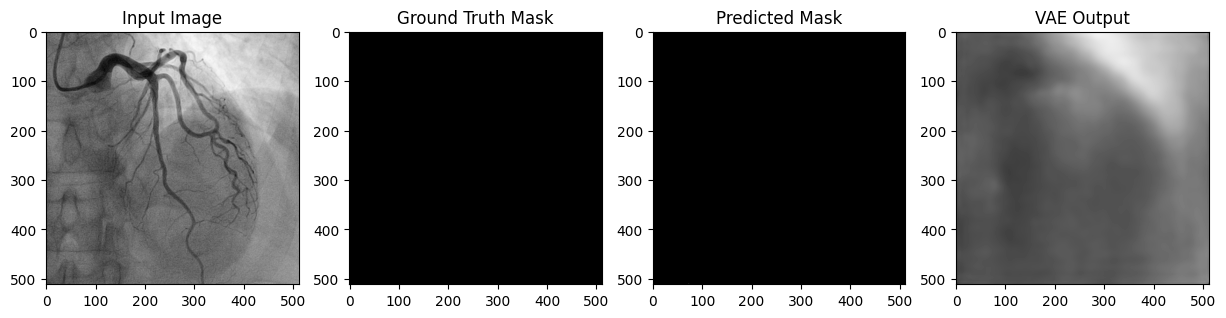

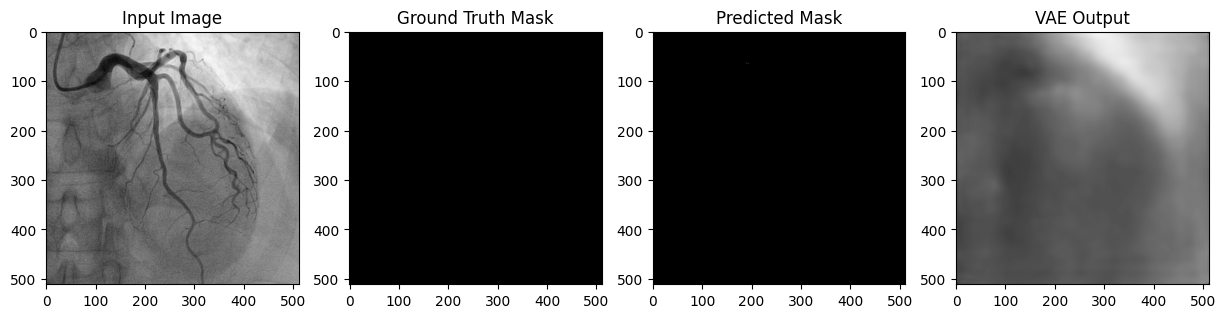

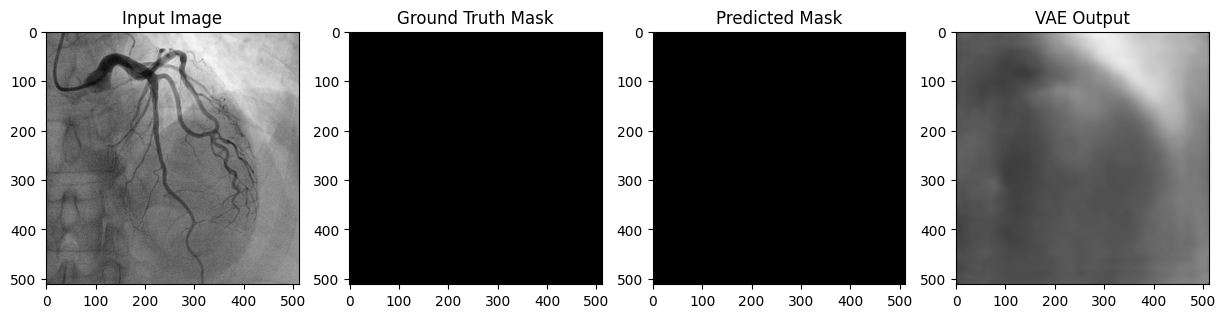

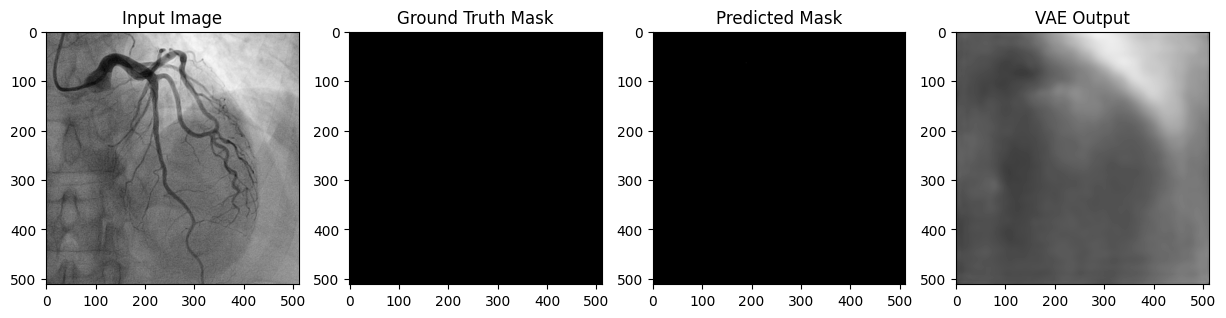

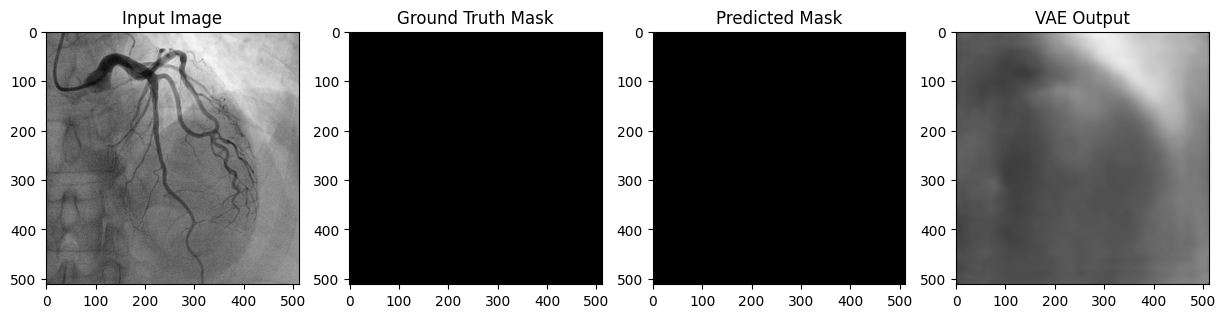

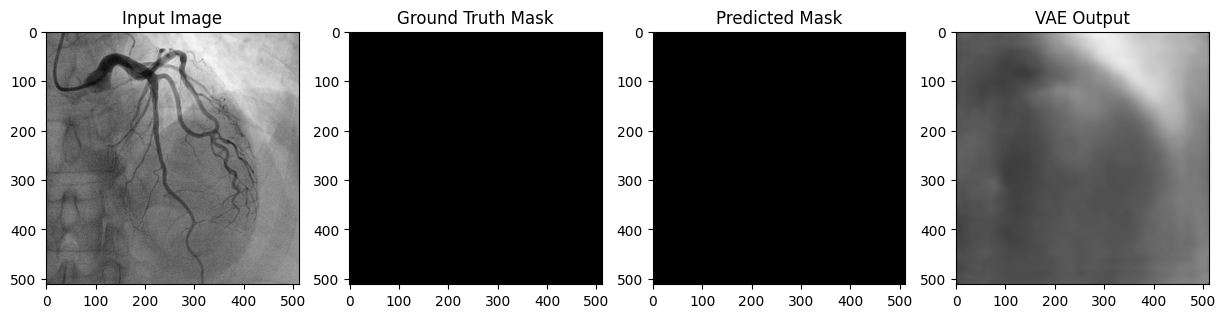

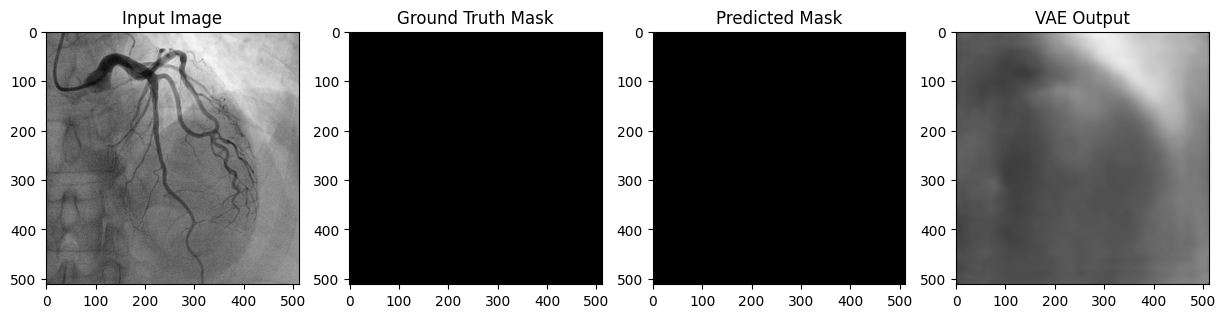

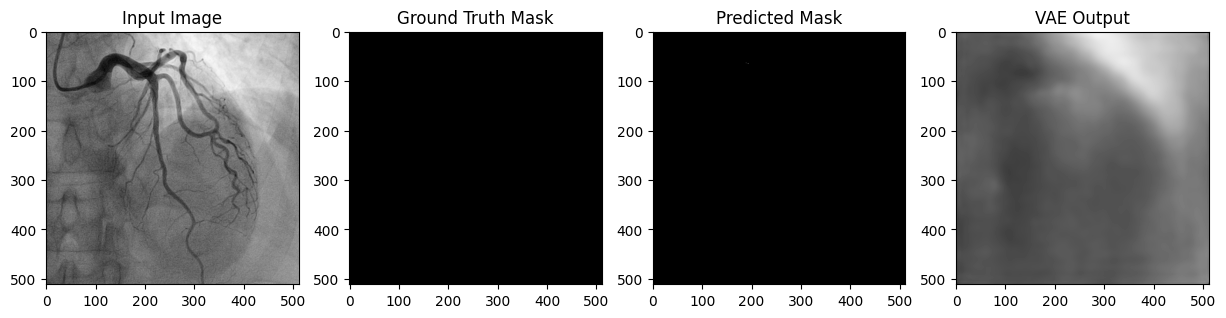

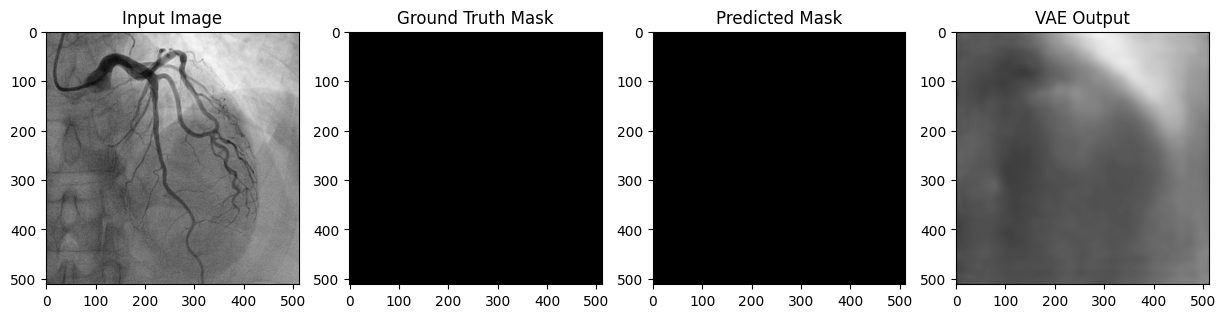

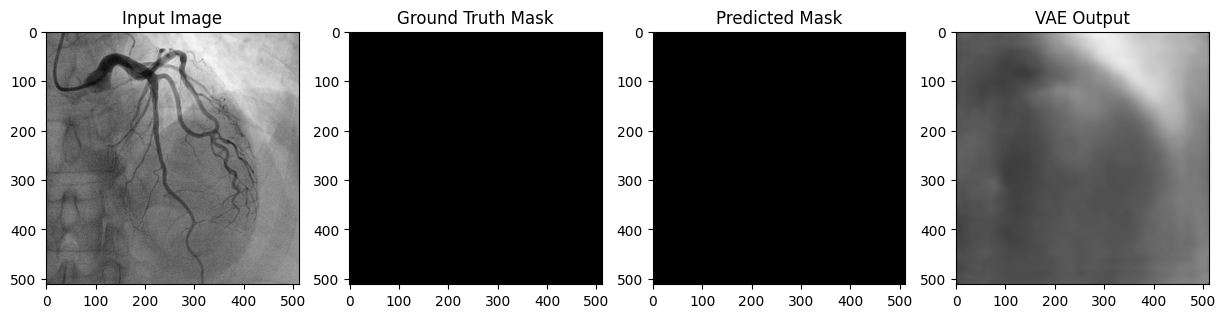

In [44]:
sfor c in range(25):
    plt.subplots(figsize=(15, 5), ncols=4)
    plt.subplot(1, 4, 1)
    plt.imshow(x[img, 0, :, :].cpu().numpy(), cmap='gray')
    plt.title('Input Image')
    plt.subplot(1, 4, 2)
    plt.imshow(y_gt[img, c, :, :].cpu().numpy(), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.subplot(1, 4, 3)
    plt.imshow(decoder_output[img, c, :, :].detach().cpu().numpy(), cmap='gray')
    plt.title('Predicted Mask')
    plt.subplot(1, 4, 4)
    plt.imshow(vae_output[img, 0, :, :].detach().cpu().numpy(), cmap='gray')
    plt.title('VAE Output')
    plt.show()